In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings

In [2]:
warnings.filterwarnings('ignore') 


In [3]:
path='D:/code academy/week 8/flights.csv/flights.csv'

In [4]:
df=pd.read_csv(path)

In [5]:
df.head()

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,...,408.0,-22.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,...,741.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,...,811.0,5.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,...,756.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,...,259.0,-21.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
df.columns

Index(['YEAR', 'MONTH', 'DAY', 'DAY_OF_WEEK', 'AIRLINE', 'FLIGHT_NUMBER',
       'TAIL_NUMBER', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT',
       'SCHEDULED_DEPARTURE', 'DEPARTURE_TIME', 'DEPARTURE_DELAY', 'TAXI_OUT',
       'WHEELS_OFF', 'SCHEDULED_TIME', 'ELAPSED_TIME', 'AIR_TIME', 'DISTANCE',
       'WHEELS_ON', 'TAXI_IN', 'SCHEDULED_ARRIVAL', 'ARRIVAL_TIME',
       'ARRIVAL_DELAY', 'DIVERTED', 'CANCELLED', 'CANCELLATION_REASON',
       'AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY',
       'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY'],
      dtype='object')

In [7]:
df.isnull().sum()

YEAR                         0
MONTH                        0
DAY                          0
DAY_OF_WEEK                  0
AIRLINE                      0
FLIGHT_NUMBER                0
TAIL_NUMBER              14721
ORIGIN_AIRPORT               0
DESTINATION_AIRPORT          0
SCHEDULED_DEPARTURE          0
DEPARTURE_TIME           86153
DEPARTURE_DELAY          86153
TAXI_OUT                 89047
WHEELS_OFF               89047
SCHEDULED_TIME               6
ELAPSED_TIME            105071
AIR_TIME                105071
DISTANCE                     0
WHEELS_ON                92513
TAXI_IN                  92513
SCHEDULED_ARRIVAL            0
ARRIVAL_TIME             92513
ARRIVAL_DELAY           105071
DIVERTED                     0
CANCELLED                    0
CANCELLATION_REASON    5729195
AIR_SYSTEM_DELAY       4755640
SECURITY_DELAY         4755640
AIRLINE_DELAY          4755640
LATE_AIRCRAFT_DELAY    4755640
WEATHER_DELAY          4755640
dtype: int64

In [8]:
# to create date column based on 'YEAR', 'Month' and 'DAY' column for time based analysis
df['DATE']=pd.to_datetime(df[['YEAR', 'MONTH', 'DAY']], format='%Y-%m-%d')

In [9]:
#to check if delays happens on weekdays or on weekends, created weekend feature
df['IS_WEEKEND']=df['DAY_OF_WEEK'].apply(lambda row: 0 if row in range(1,6) else 1)

In [10]:
#checking
df.loc[df['DAY_OF_WEEK']==7, ['IS_WEEKEND', 'DAY_OF_WEEK']]

,IS_WEEKEND,DAY_OF_WEEK
46125,1,7
46126,1,7
46127,1,7
46128,1,7
46129,1,7
...,...,...
5757170,1,7
5757171,1,7
5757172,1,7
5757173,1,7


In [11]:
df['AIRLINE'].value_counts()

AIRLINE
WN    1261855
DL     875881
AA     725984
OO     588353
EV     571977
UA     515723
MQ     294632
B6     267048
US     198715
AS     172521
NK     117379
F9      90836
HA      76272
VX      61903
Name: count, dtype: int64

In [12]:
#saatlarin formati sehv idi datasetde bes yazilan 00:05 demekdir, 1704 yazilan 17:04 demekdir

import datetime
import regex as re

def format_heure(chaine):
    if pd.isnull(chaine):
        return np.nan
    else:
        chaine=str(chaine)
        chaine = re.sub(r'\D', '', chaine)  # Remove non-digit characters, \D stands for non digit
        chaine = chaine.replace(' ', '')  # Remove spaces
        chaine = chaine.zfill(4)  # The zfill() method adds zeros (0) at the beginning of the string, until it reaches the specified length.
        if chaine[:2] == '24':
            heure = datetime.time(0, int(chaine[2:]))
        else:
            heure = datetime.time(int(chaine[:2]), int(chaine[2:])) #assigns first two digits to hours, last two digits to the minute
        return heure


In [13]:
df['SCHEDULED_DEPARTURE']=df['SCHEDULED_DEPARTURE'].map(format_heure)

df['DEPARTURE_TIME']=df['DEPARTURE_TIME'].apply(lambda row: str(row).split('.')[0]) #float formatinda olanlari da handle etmek ucun
df['DEPARTURE_TIME']=df['DEPARTURE_TIME'].map(format_heure)

df['SCHEDULED_ARRIVAL']=df['SCHEDULED_ARRIVAL'].apply(format_heure)

df['ARRIVAL_TIME']=df['ARRIVAL_TIME'].apply(lambda row: str(row).split('.')[0])
df['ARRIVAL_TIME']=df['ARRIVAL_TIME'].apply(format_heure)

In [14]:
pd.set_option('display.max_columns', 100)

In [15]:
df.head()

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,DATE,IS_WEEKEND
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,00:05:00,23:54:00,-11.0,21.0,15.0,205.0,194.0,169.0,1448,404.0,4.0,04:30:00,04:08:00,-22.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,2015-01-01,0
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,00:10:00,00:02:00,-8.0,12.0,14.0,280.0,279.0,263.0,2330,737.0,4.0,07:50:00,07:41:00,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,2015-01-01,0
2,2015,1,1,4,US,840,N171US,SFO,CLT,00:20:00,00:18:00,-2.0,16.0,34.0,286.0,293.0,266.0,2296,800.0,11.0,08:06:00,08:11:00,5.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,2015-01-01,0
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,00:20:00,00:15:00,-5.0,15.0,30.0,285.0,281.0,258.0,2342,748.0,8.0,08:05:00,07:56:00,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,2015-01-01,0
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,00:25:00,00:24:00,-1.0,11.0,35.0,235.0,215.0,199.0,1448,254.0,5.0,03:20:00,02:59:00,-21.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,2015-01-01,0


In [16]:
#target sutunu yaradiram
df['DELAY']=df['ARRIVAL_DELAY'].apply(lambda row: 1 if row>0 else 0)

In [17]:
df[df['CANCELLED']==1]

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,DATE,IS_WEEKEND,DELAY
32,2015,1,1,4,AS,136,N431AS,ANC,SEA,01:35:00,00:00:00,NaN,NaN,NaN,205.0,NaN,NaN,1448,NaN,NaN,06:00:00,00:00:00,NaN,0,1,A,NaN,NaN,NaN,NaN,NaN,2015-01-01,0,0
42,2015,1,1,4,AA,2459,N3BDAA,PHX,DFW,02:00:00,00:00:00,NaN,NaN,NaN,120.0,NaN,NaN,868,NaN,NaN,05:00:00,00:00:00,NaN,0,1,B,NaN,NaN,NaN,NaN,NaN,2015-01-01,0,0
68,2015,1,1,4,OO,5254,N746SK,MAF,IAH,05:10:00,00:00:00,NaN,NaN,NaN,87.0,NaN,NaN,429,NaN,NaN,06:37:00,00:00:00,NaN,0,1,B,NaN,NaN,NaN,NaN,NaN,2015-01-01,0,0
82,2015,1,1,4,MQ,2859,N660MQ,SGF,DFW,05:25:00,00:00:00,NaN,NaN,NaN,95.0,NaN,NaN,364,NaN,NaN,07:00:00,00:00:00,NaN,0,1,B,NaN,NaN,NaN,NaN,NaN,2015-01-01,0,0
90,2015,1,1,4,OO,5460,N583SW,RDD,SFO,05:30:00,00:00:00,NaN,NaN,NaN,90.0,NaN,NaN,199,NaN,NaN,07:00:00,00:00:00,NaN,0,1,A,NaN,NaN,NaN,NaN,NaN,2015-01-01,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5818090,2015,12,31,4,UA,1789,NaN,IAH,TPA,19:55:00,00:00:00,NaN,NaN,NaN,125.0,NaN,NaN,787,NaN,NaN,23:00:00,00:00:00,NaN,0,1,A,NaN,NaN,NaN,NaN,NaN,2015-12-31,0,0
5818157,2015,12,31,4,UA,222,NaN,SFO,LAX,20:00:00,00:00:00,NaN,NaN,NaN,96.0,NaN,NaN,337,NaN,NaN,21:36:00,00:00:00,NaN,0,1,A,NaN,NaN,NaN,NaN,NaN,2015-12-31,0,0
5818318,2015,12,31,4,AA,2245,N880AA,MIA,SAN,20:19:00,00:00:00,NaN,NaN,NaN,337.0,NaN,NaN,2267,NaN,NaN,22:56:00,00:00:00,NaN,0,1,A,NaN,NaN,NaN,NaN,NaN,2015-12-31,0,0
5818777,2015,12,31,4,NK,416,N522NK,FLL,IAG,21:55:00,00:00:00,NaN,NaN,NaN,175.0,NaN,NaN,1176,NaN,NaN,00:50:00,00:00:00,NaN,0,1,A,NaN,NaN,NaN,NaN,NaN,2015-12-31,0,0


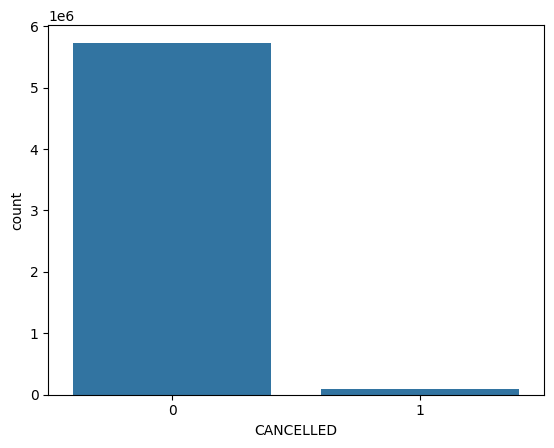

In [18]:
sns.countplot(data=df, x="CANCELLED", )
plt.show()

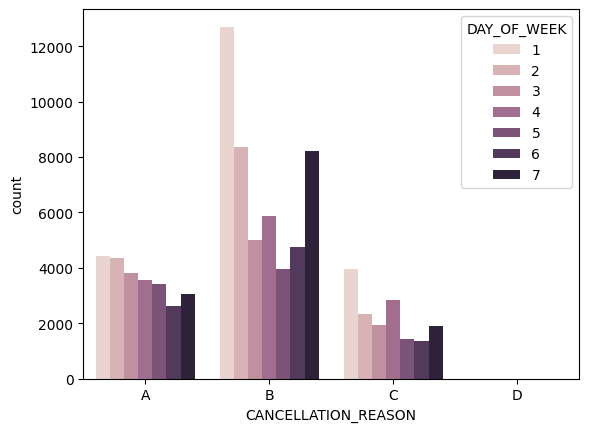

In [17]:
sns.countplot(data=df, x="CANCELLATION_REASON", hue='DAY_OF_WEEK')
plt.show()
#En cos heftenin bazar ertesi ve bazar gunu flightlar cancel olur

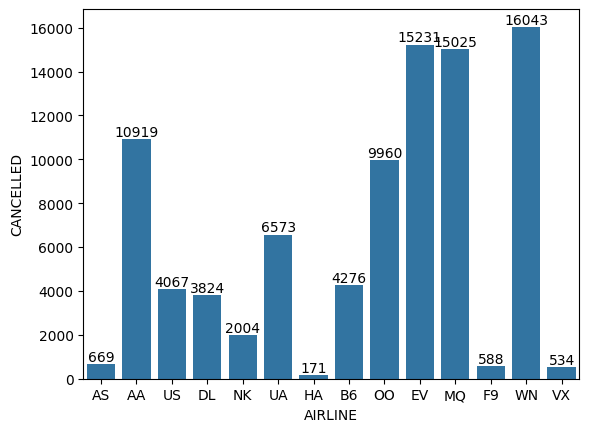

In [18]:
ax = sns.barplot(data=df, x="AIRLINE", y="CANCELLED", estimator="sum", errorbar=None)
ax.bar_label(ax.containers[0], fontsize=10)
plt.show()

In [19]:
df=df[df['CANCELLED']==0]
df.drop(columns=['CANCELLED', 'CANCELLATION_REASON'], inplace=True)

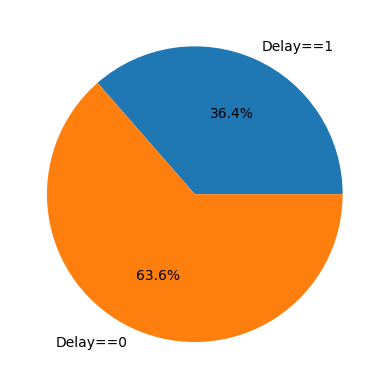

In [23]:
delay_counts=df['DELAY'].sum()
non_delay_counts=len(df)-delay_counts
counts=[delay_counts, non_delay_counts]
labels=['Delay==1', 'Delay==0']
fig, ax = plt.subplots()
ax.pie(counts,labels=labels, autopct='%1.1f%%')

plt.show()

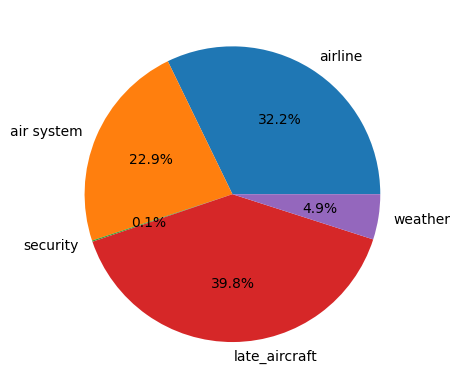

In [27]:
airline_delay=df['AIRLINE_DELAY'].sum()
air_system_delay=df['AIR_SYSTEM_DELAY'].sum()
security_delay=df['SECURITY_DELAY'].sum()
late_aircraft_delay=df['LATE_AIRCRAFT_DELAY'].sum()
weather_delay=df['WEATHER_DELAY'].sum()
delay_reason_counts=[airline_delay, air_system_delay, security_delay, late_aircraft_delay, weather_delay]
labels=['airline', 'air system', 'security', 'late_aircraft', 'weather']

fig,ax=plt.subplots()
ax.pie(delay_reason_counts, labels=labels, autopct='%1.1f%%')

plt.show()

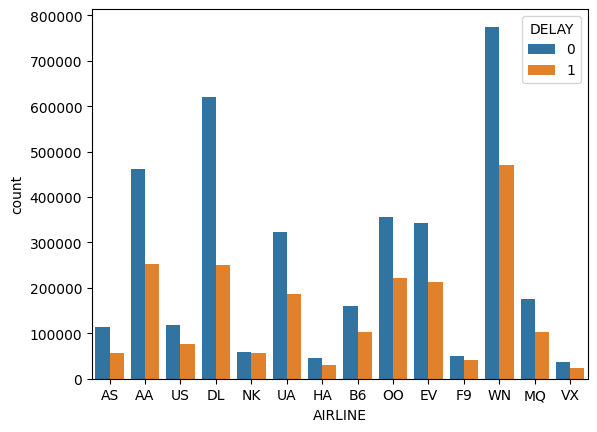

In [21]:
sns.countplot(data=df, x="AIRLINE", hue='DELAY')
plt.show()

In [29]:
airline_delay_statistics=df.groupby(by=['AIRLINE']).agg({'AIRLINE_DELAY':'sum'}).to_dict()['AIRLINE_DELAY']

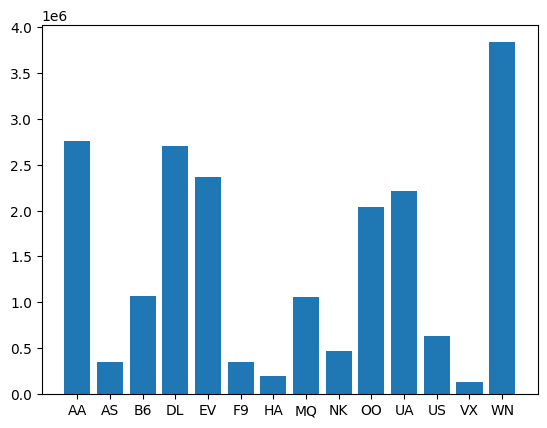

In [30]:
plt.bar(range(len(airline_delay_statistics)), list(airline_delay_statistics.values()), align='center')
plt.xticks(range(len(airline_delay_statistics)), list(airline_delay_statistics.keys()))
plt.show()

In [32]:
aircraft_delay_statistics=df.groupby(by=['AIRLINE']).agg({'LATE_AIRCRAFT_DELAY':'sum'}).to_dict()['LATE_AIRCRAFT_DELAY']

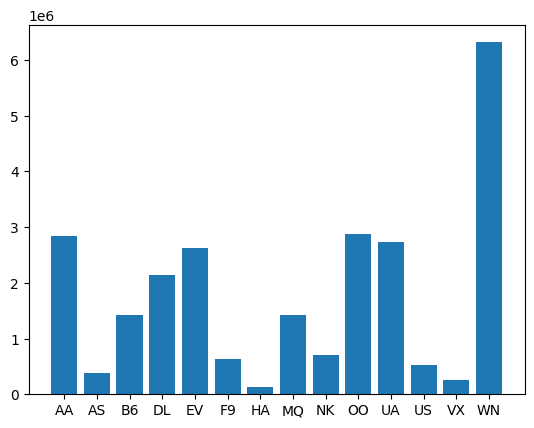

In [33]:
plt.bar(range(len(aircraft_delay_statistics)), list(aircraft_delay_statistics.values()), align='center')
plt.xticks(range(len(aircraft_delay_statistics)), list(aircraft_delay_statistics.keys()))
plt.show()

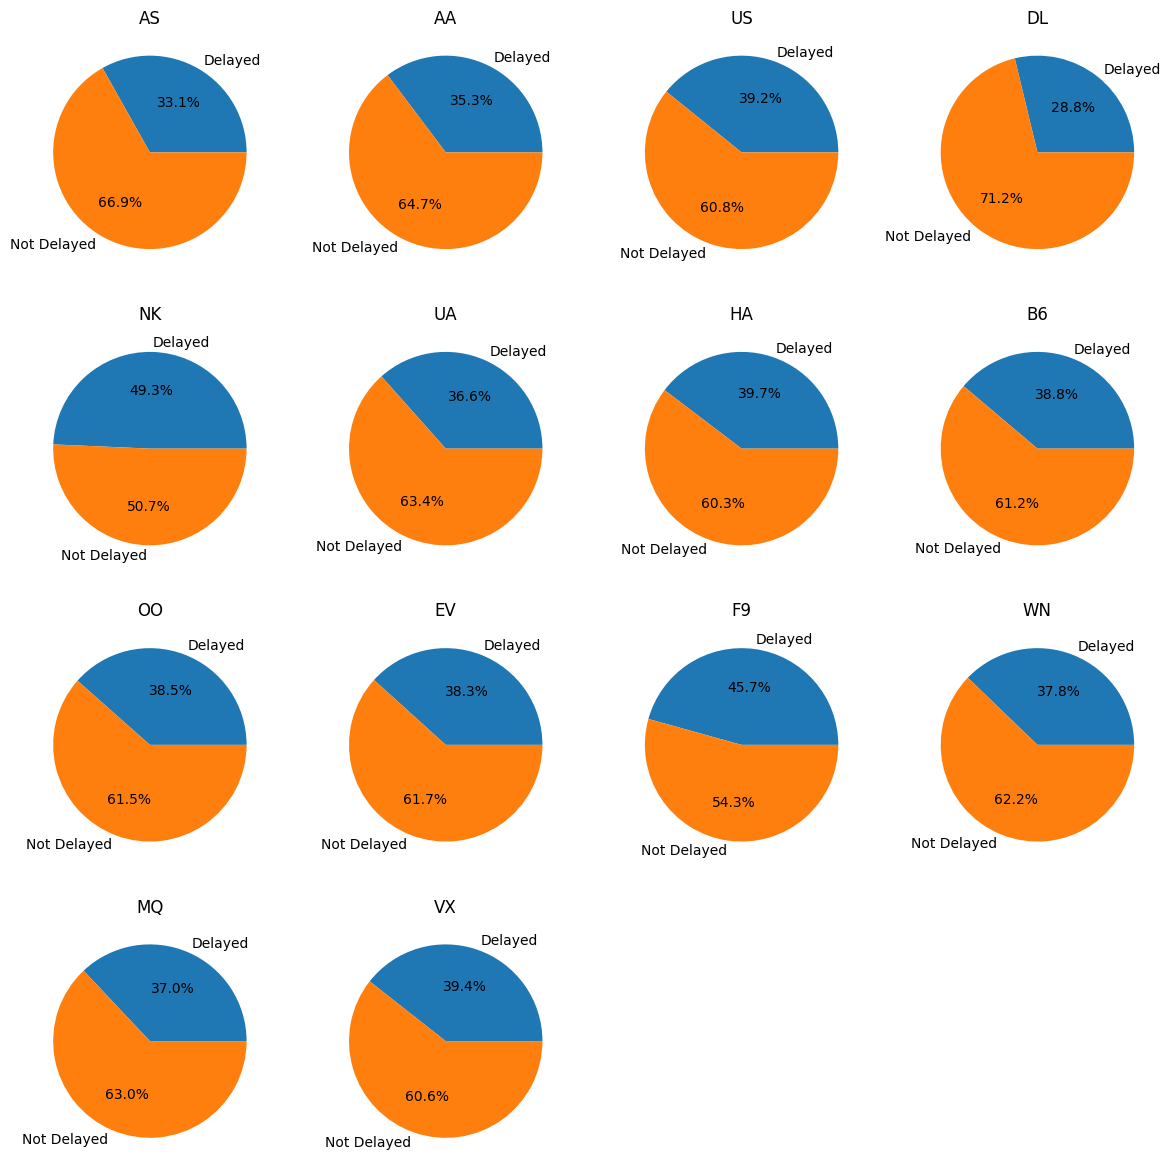

In [37]:
airline_names=df['AIRLINE'].unique()
plt.figure(figsize=(12, 12))  # Adjust the figure size as needed

for i, airline in enumerate(airline_names):
    airline_data = df[df['AIRLINE'] == airline]
    delay_counts = (airline_data['DELAY'] == 1).sum()
    non_delay_counts = len(airline_data) - delay_counts
    
    plt.subplot(4, 4, i + 1)
    
    plt.pie([delay_counts, non_delay_counts], labels=['Delayed', 'Not Delayed'], autopct='%1.1f%%')
    plt.title(airline)

plt.tight_layout()
plt.show()

In [38]:
#Taxi-out time in aviation refers to the duration of time an aircraft spends on the ground moving under its own power from the departure gate or parking stand to the takeoff runway.
#taxi out time adeten 20 deqiqeden cox olmur, cox olmagi problemdir
df['TAXI_OUT'].value_counts()

TAXI_OUT
12.0     463136
11.0     462098
13.0     440197
10.0     430560
14.0     402904
          ...  
178.0         1
200.0         1
173.0         1
169.0         1
176.0         1
Name: count, Length: 184, dtype: int64

#Columns meaning

TAXI_OUT: This refers to the time duration, typically in minutes, that an aircraft spends moving under its own power from the departure gate to the runway for takeoff.

WHEELS_OFF: This indicates the time at which the aircraft's wheels leave the ground, marking the moment of takeoff.

SCHEDULED_TIME: This is the planned or scheduled duration of the flight, usually provided by the airline in advance.

ELAPSED_TIME: This column represents the actual time taken for the flight from departure to arrival, including taxiing, takeoff, flight time, and landing.

AIR_TIME: This is the duration of the flight while the aircraft is in the air, excluding taxiing, takeoff, and landing times.

DISTANCE: The distance covered by the flight, typically measured in miles or kilometers.

WHEELS_ON: The time at which the aircraft's wheels make contact with the runway upon landing.

TAXI_IN: The time duration spent by the aircraft taxiing from the runway to the arrival gate after landing.

ARRIVAL_DELAY: This column represents the difference in minutes between the scheduled arrival time and the actual arrival time of the flight. A positive value indicates the flight arrived late, while a negative value indicates it arrived early.

In [19]:
numeric_columns=['TAXI_OUT', 'WHEELS_OFF', 'SCHEDULED_TIME', 'ELAPSED_TIME', 'AIR_TIME', 'DISTANCE', 'WHEELS_ON', 'TAXI_IN', 'ARRIVAL_DELAY']

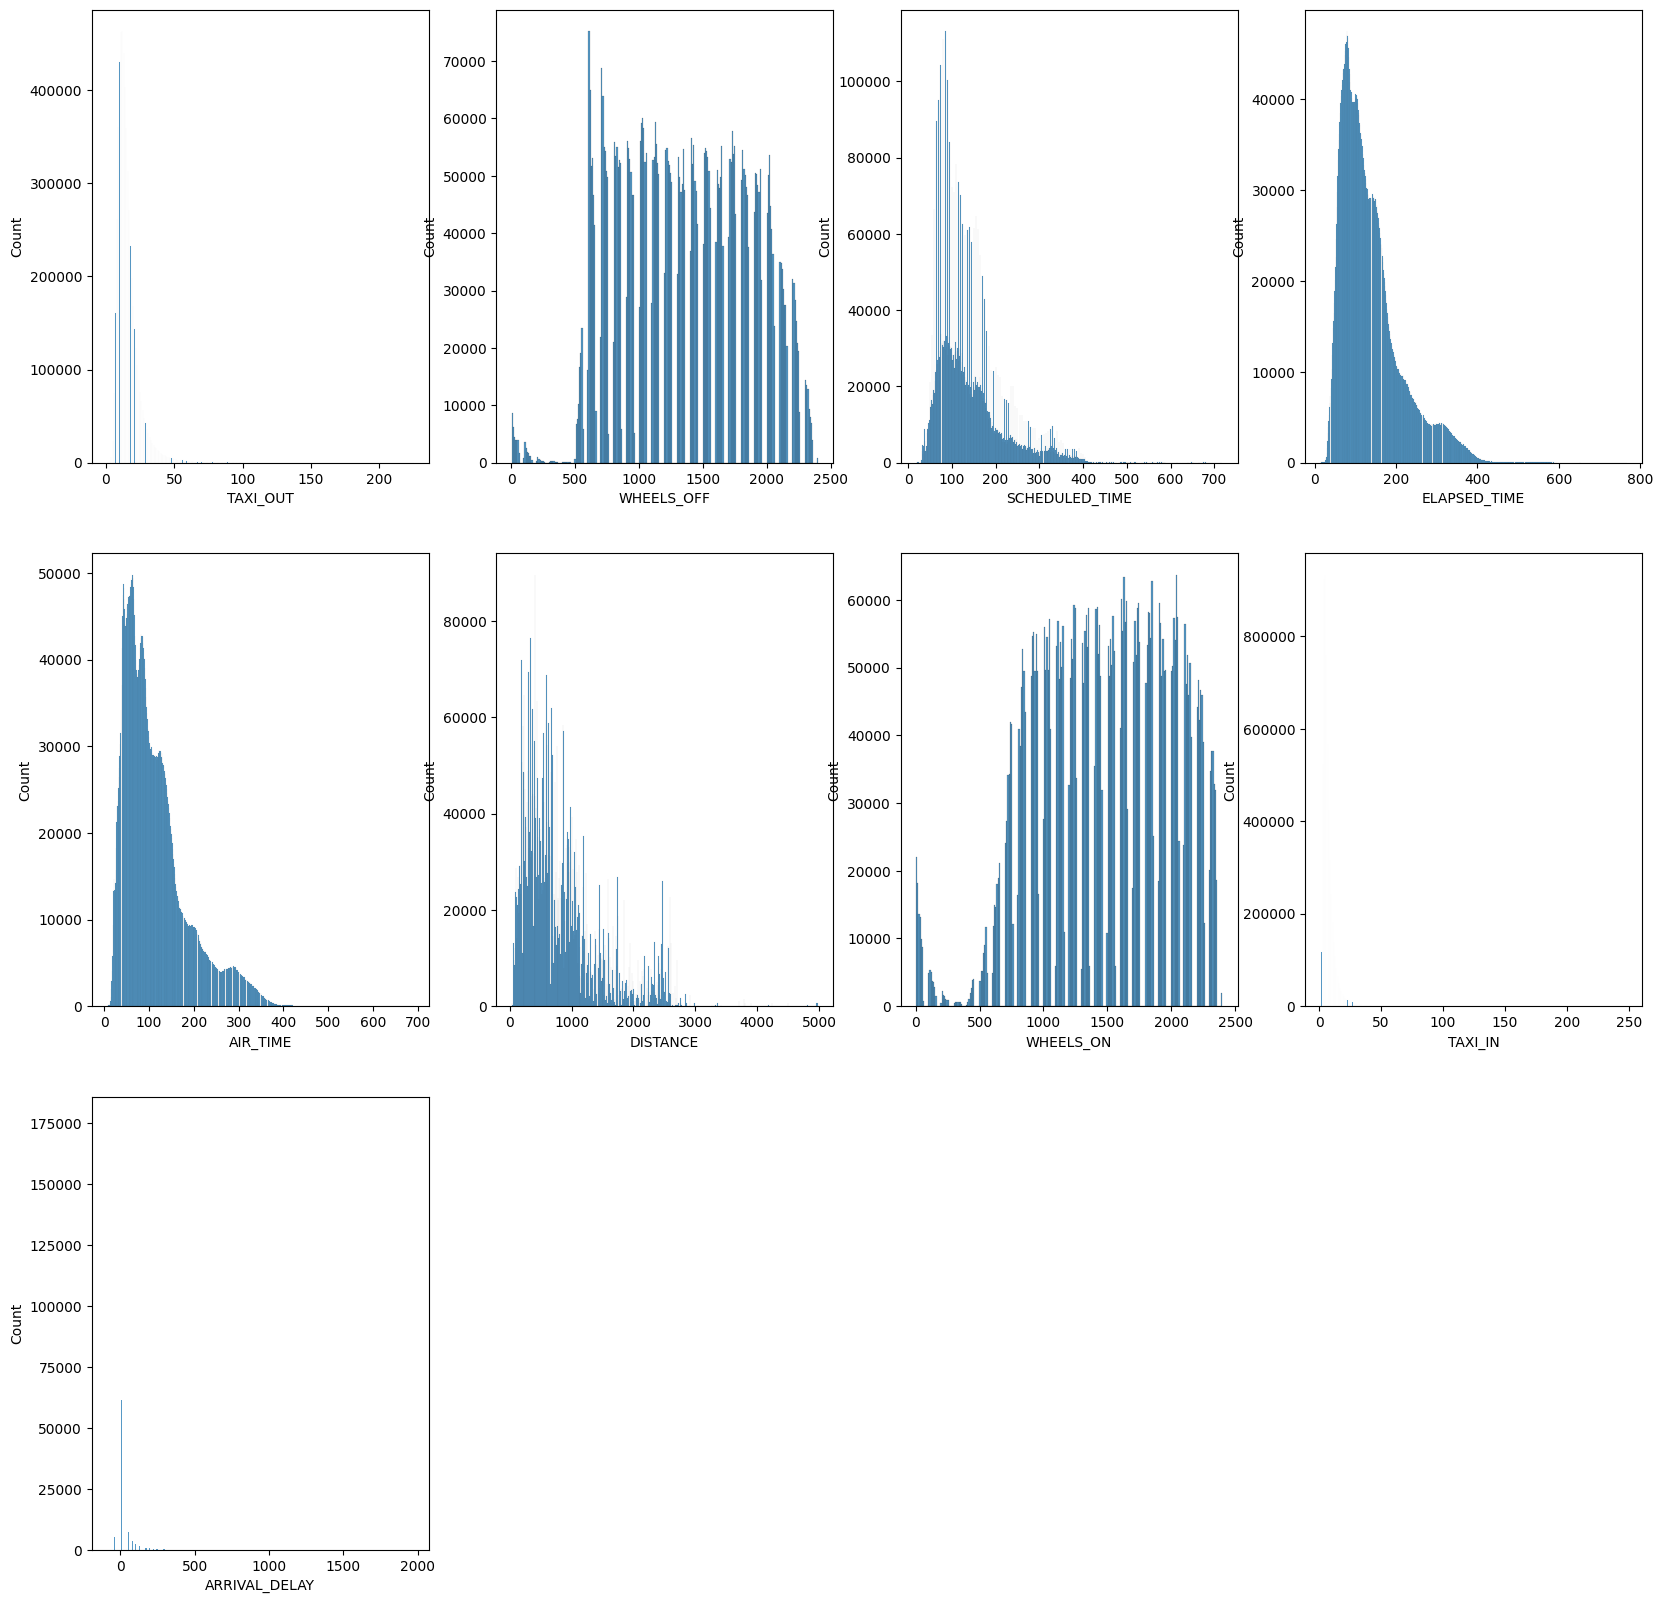

In [20]:
plt.figure(figsize=(20,20))
i=1
for col in numeric_columns:
    plt.subplot(3,4,i)
    sns.histplot(df[col])
    i+=1

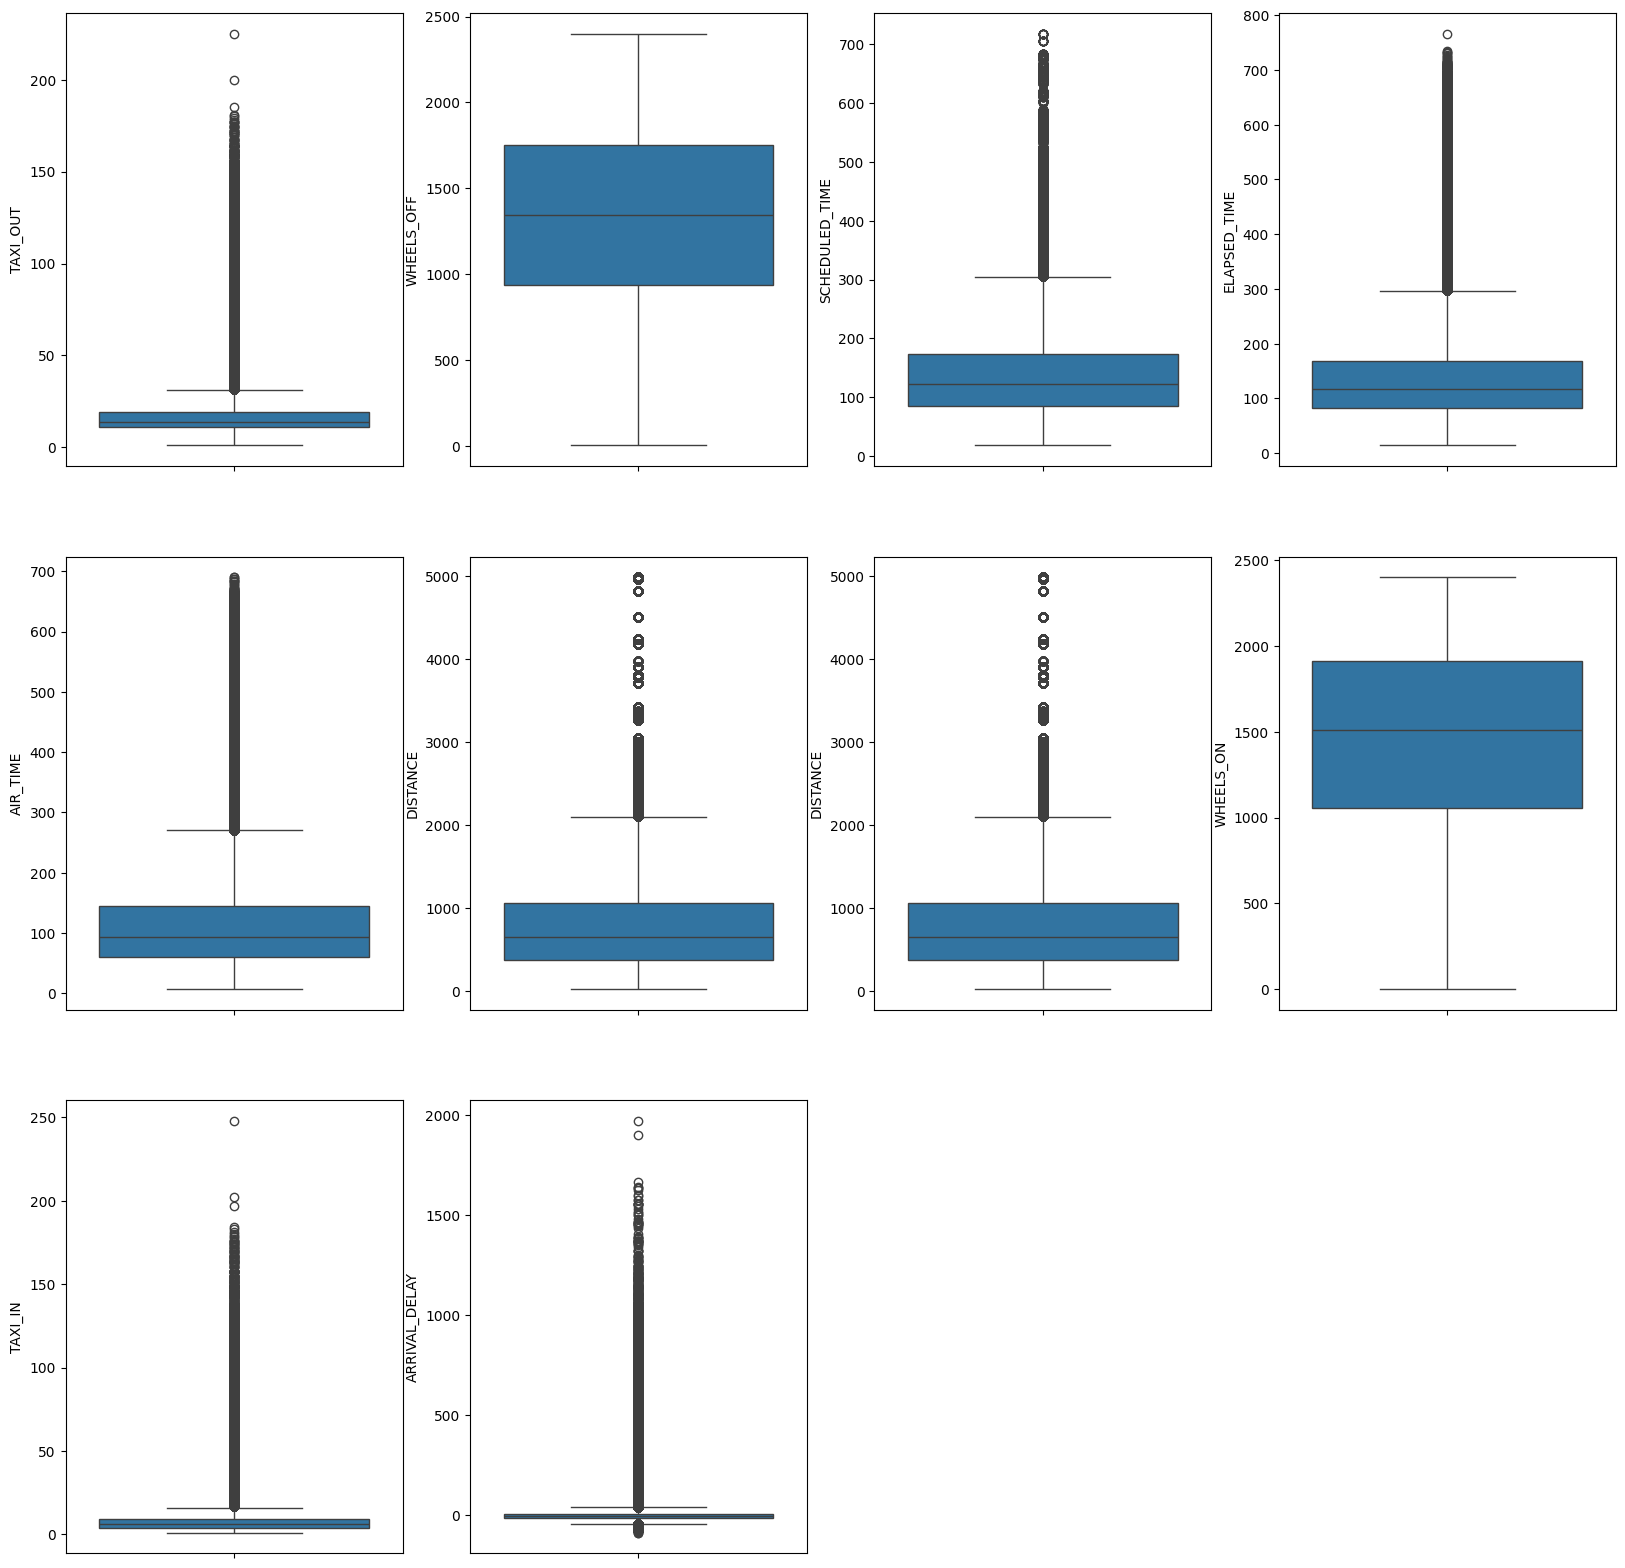

In [36]:
plt.figure(figsize=(20,20))
i=1
for col in numeric_columns:
    plt.subplot(3,4,i)
    sns.boxplot(df[col])
    i+=1

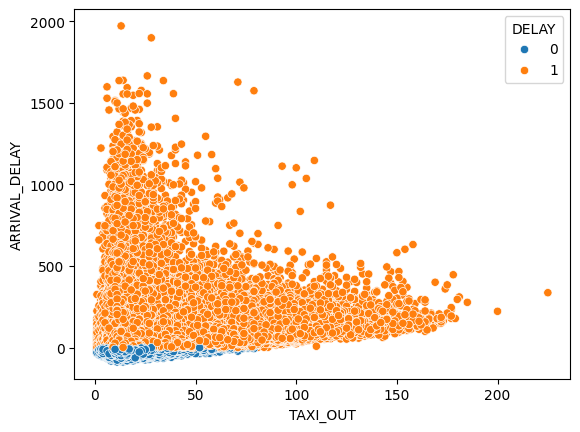

In [51]:
sns.scatterplot(data=df, x="TAXI_OUT", y="ARRIVAL_DELAY", hue="DELAY")
plt.show()

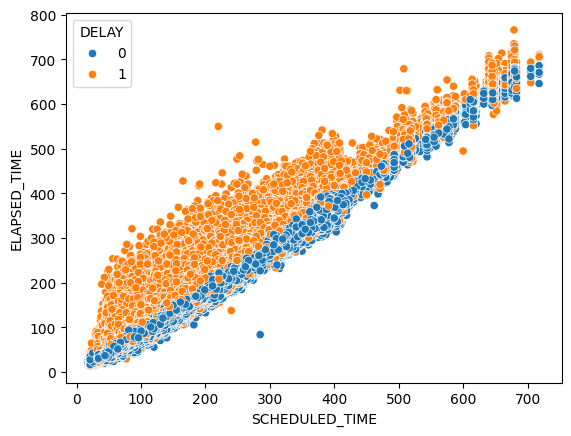

In [37]:
sns.scatterplot(data=df, x="SCHEDULED_TIME", y="ELAPSED_TIME", hue="DELAY")
plt.show()

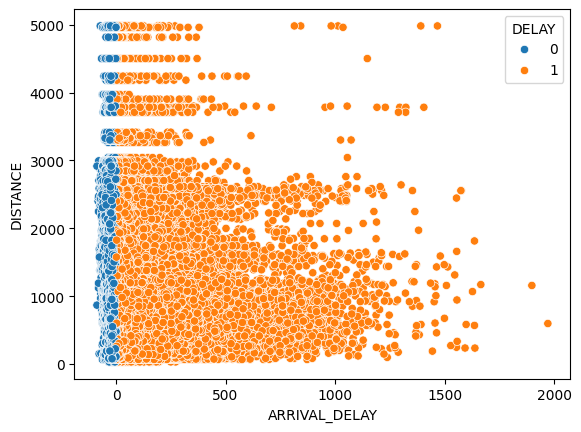

In [38]:
sns.scatterplot(data=df, x="ARRIVAL_DELAY", y="DISTANCE", hue="DELAY")
plt.show()

Differencies in frequency shown by histograms

Mean for Target==0 14.214736901061665
Mean for Target==1 19.311095042589567


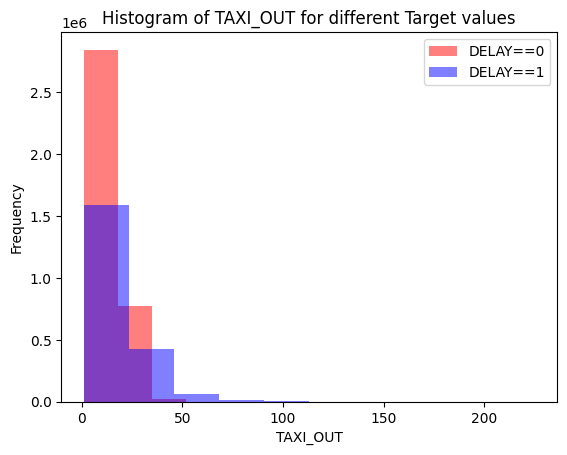

In [41]:
t='TAXI_OUT'
target_0_data=df.loc[df['DELAY']==0, t]
target_1_data=df.loc[df['DELAY']==1, t]

plt.hist(x=target_0_data, alpha=0.5, label='DELAY==0', color='red')
plt.hist(x=target_1_data, alpha=0.5, label='DELAY==1', color='blue')

plt.xlabel(t)
plt.ylabel('Frequency')
plt.title(f'Histogram of {t} for different Target values')
plt.legend()

print(f'Mean for Target==0 {target_0_data.mean()}')
print(f'Mean for Target==1 {target_1_data.mean()}')

Mean for Target==0 6.828900697041215
Mean for Target==1 8.49199289279389


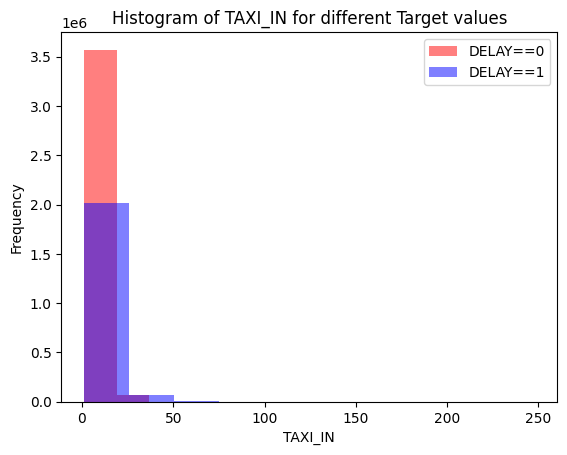

In [48]:
t='TAXI_IN'
target_0_data=df.loc[df['DELAY']==0, t]
target_1_data=df.loc[df['DELAY']==1, t]

plt.hist(x=target_0_data, alpha=0.5, label='DELAY==0', color='red')
plt.hist(x=target_1_data, alpha=0.5, label='DELAY==1', color='blue')

plt.xlabel(t)
plt.ylabel('Frequency')
plt.title(f'Histogram of {t} for different Target values')
plt.legend()

print(f'Mean for Target==0 {target_0_data.mean()}')
print(f'Mean for Target==1 {target_1_data.mean()}')

Mean for Target==0 -12.109194863571899
Mean for Target==1 33.11299029755196


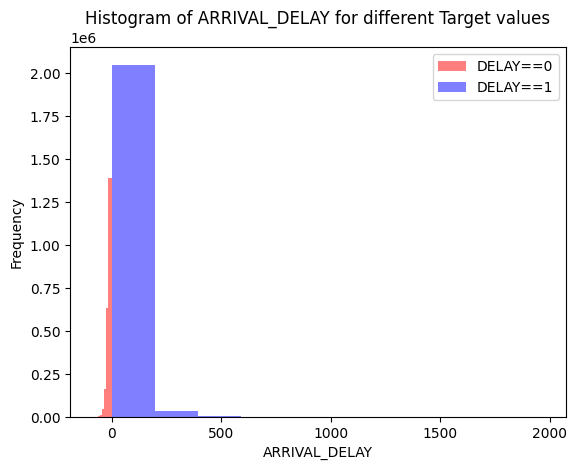

In [49]:
t='ARRIVAL_DELAY'
target_0_data=df.loc[df['DELAY']==0, t]
target_1_data=df.loc[df['DELAY']==1, t]

plt.hist(x=target_0_data, alpha=0.5, label='DELAY==0', color='red')
plt.hist(x=target_1_data, alpha=0.5, label='DELAY==1', color='blue')

plt.xlabel(t)
plt.ylabel('Frequency')
plt.title(f'Histogram of {t} for different Target values')
plt.legend()

print(f'Mean for Target==0 {target_0_data.mean()}')
print(f'Mean for Target==1 {target_1_data.mean()}')

In [52]:
df['TAXI_OUT'].corr(df['DELAY'])

0.27572990385364066

C:\Users\lenovo\AppData\Local\Temp\ipykernel_2084\271502053.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['xlog'] = np.log(df[target] + 1)
C:\Users\lenovo\AppData\Local\Temp\ipykernel_2084\271502053.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['xpow'] = np.power(df[target], 2)
C:\Users\lenovo\AppData\Local\Temp\ipykernel_2084\271502053.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead



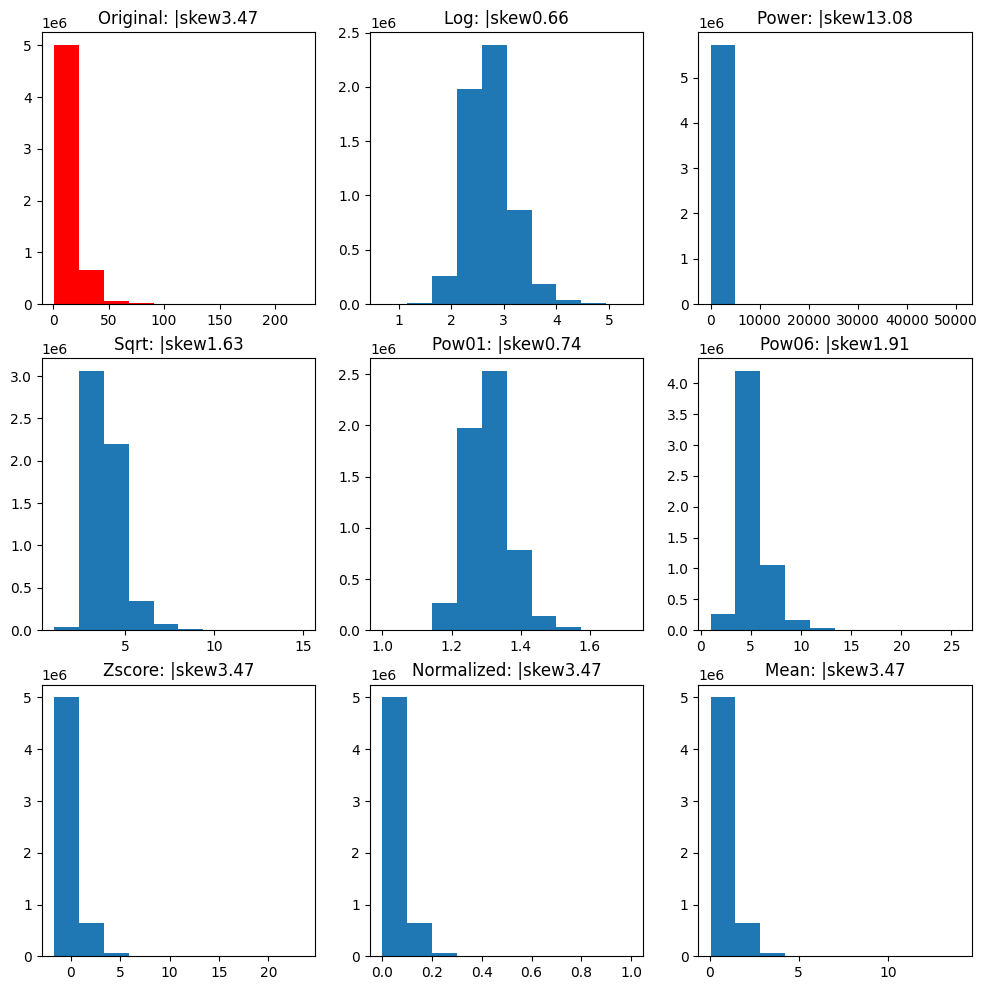

In [53]:
target = 'TAXI_OUT'

fig, (ax1, ax2, ax3) = plt.subplots(3, 3, figsize=(12,12))

df['xlog'] = np.log(df[target] + 1)
df['xpow'] = np.power(df[target], 2)
df['xsqrt'] = np.sqrt(df[target])
df['xp1'] = np.power(df[target], 0.1)
df['xp3'] = np.power(df[target], 0.6)
df['xz'] = (df[target] - df[target].mean()) / df[target].std()
df['xnorm'] = (df[target] - df[target].min()) / (df[target].max() - df[target].min())
df['xmean'] = (df[target] / df[target].mean())

ax1[0].hist(df[target], color='red')
ax1[1].hist(df['xlog'])
ax1[2].hist(df['xpow'])

ax2[0].hist(df['xsqrt'])
ax2[1].hist(df['xp1'])
ax2[2].hist(df['xp3'])

ax3[0].hist(df['xz'])
ax3[1].hist(df['xnorm'])
ax3[2].hist(df['xmean'])

ax1[0].set_title(f'Original: |skew{round(df[target].skew(), 2)}')
ax1[1].set_title(f'Log: |skew{round(df["xlog"].skew(), 2)}')
ax1[2].set_title(f'Power: |skew{round(df["xpow"].skew(), 2)}')

ax2[0].set_title(f'Sqrt: |skew{round(df["xsqrt"].skew(), 2)}')
ax2[1].set_title(f'Pow01: |skew{round(df["xp1"].skew(), 2)}')
ax2[2].set_title(f'Pow06: |skew{round(df["xp3"].skew(), 2)}')

ax3[0].set_title(f'Zscore: |skew{round(df["xz"].skew(), 2)}')
ax3[1].set_title(f'Normalized: |skew{round(df["xnorm"].skew(), 2)}')
ax3[2].set_title(f'Mean: |skew{round(df["xmean"].skew(), 2)}')

plt.show()

In [54]:
df['xlog'].corr(df['DELAY'])

0.2580189232612969

In [60]:
df['TAXI_IN'].corr(df['DELAY'])

0.14195027660257242

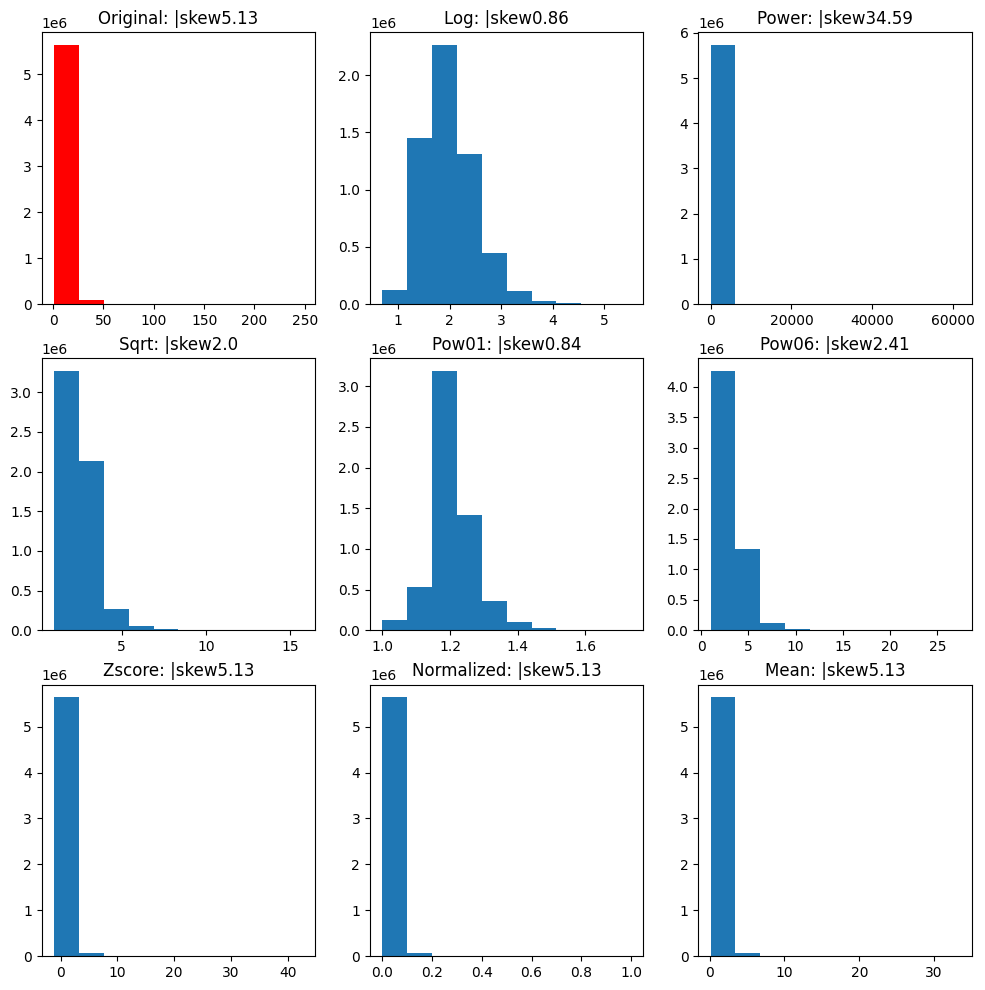

In [61]:
target = 'TAXI_IN'

fig, (ax1, ax2, ax3) = plt.subplots(3, 3, figsize=(12,12))

df['xlog'] = np.log(df[target] + 1)
df['xpow'] = np.power(df[target], 2)
df['xsqrt'] = np.sqrt(df[target])
df['xp1'] = np.power(df[target], 0.1)
df['xp3'] = np.power(df[target], 0.6)
df['xz'] = (df[target] - df[target].mean()) / df[target].std()
df['xnorm'] = (df[target] - df[target].min()) / (df[target].max() - df[target].min())
df['xmean'] = (df[target] / df[target].mean())

ax1[0].hist(df[target], color='red')
ax1[1].hist(df['xlog'])
ax1[2].hist(df['xpow'])

ax2[0].hist(df['xsqrt'])
ax2[1].hist(df['xp1'])
ax2[2].hist(df['xp3'])

ax3[0].hist(df['xz'])
ax3[1].hist(df['xnorm'])
ax3[2].hist(df['xmean'])

ax1[0].set_title(f'Original: |skew{round(df[target].skew(), 2)}')
ax1[1].set_title(f'Log: |skew{round(df["xlog"].skew(), 2)}')
ax1[2].set_title(f'Power: |skew{round(df["xpow"].skew(), 2)}')

ax2[0].set_title(f'Sqrt: |skew{round(df["xsqrt"].skew(), 2)}')
ax2[1].set_title(f'Pow01: |skew{round(df["xp1"].skew(), 2)}')
ax2[2].set_title(f'Pow06: |skew{round(df["xp3"].skew(), 2)}')

ax3[0].set_title(f'Zscore: |skew{round(df["xz"].skew(), 2)}')
ax3[1].set_title(f'Normalized: |skew{round(df["xnorm"].skew(), 2)}')
ax3[2].set_title(f'Mean: |skew{round(df["xmean"].skew(), 2)}')

plt.show()

In [62]:
df['xlog'].corr(df['DELAY'])

0.11927981460483147

In [63]:
columns_to_drop = ['xlog', 'xpow', 'xsqrt', 'xp1', 'xp3', 'xz', 'xnorm', 'xmean']
df = df.drop(columns=columns_to_drop)

In [20]:
#scaling wide relatively range data
from sklearn.preprocessing import StandardScaler

columns_to_scale = ['WHEELS_OFF','SCHEDULED_TIME','ELAPSED_TIME','AIR_TIME','DISTANCE','WHEELS_ON']

scaler = StandardScaler()
df[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])

In [21]:
df.head()

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,DATE,IS_WEEKEND,DELAY
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,00:05:00,23:54:00,-11.0,21.0,-2.695081,0.836955,0.767996,0.768209,1.023560,-2.044223,4.0,04:30:00,04:08:00,-22.0,0,NaN,NaN,NaN,NaN,NaN,2015-01-01,0,0
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,00:10:00,00:02:00,-8.0,12.0,-2.697089,1.832508,1.913378,2.069593,2.472314,-1.406522,4.0,07:50:00,07:41:00,-9.0,0,NaN,NaN,NaN,NaN,NaN,2015-01-01,0,0
2,2015,1,1,4,US,840,N171US,SFO,CLT,00:20:00,00:18:00,-2.0,16.0,-2.656928,1.912152,2.102029,2.111126,2.416466,-1.285875,11.0,08:06:00,08:11:00,5.0,0,NaN,NaN,NaN,NaN,NaN,2015-01-01,0,1
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,00:20:00,00:15:00,-5.0,15.0,-2.664960,1.898878,1.940328,2.000370,2.492025,-1.385456,8.0,08:05:00,07:56:00,-9.0,0,NaN,NaN,NaN,NaN,NaN,2015-01-01,0,0
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,00:25:00,00:24:00,-1.0,11.0,-2.654920,1.235176,1.050973,1.183544,1.023560,-2.331476,5.0,03:20:00,02:59:00,-21.0,0,NaN,NaN,NaN,NaN,NaN,2015-01-01,0,0


In [22]:
# create dictionary based on the frequency of the airline in dataset and frequency encoding for Airline column
airline_map_dict=df['AIRLINE'].value_counts(normalize=True).to_dict()
df['AIRLINE']=df['AIRLINE'].map(airline_map_dict)

In [23]:
df['FLIGHT_NUMBER'].value_counts()

FLIGHT_NUMBER
469     3941
327     3504
326     3468
403     3336
667     3325
        ... 
6757       1
6793       1
6752       1
6758       1
6887       1
Name: count, Length: 6947, dtype: int64

In [24]:
#bir sutun daxilinde heddinden artiq cox deyer oldugu ucun ve AIRLINE ve AIRPORT datasi ile boslugu doldura bileceyimi dusunerek drop edirem.
df.drop(columns=['FLIGHT_NUMBER'], inplace=True)

In [25]:
def hour_category(row):
    hour_part = row.hour 
    if hour_part < 4:
        return 0
    elif hour_part < 7:
        return 1
    elif hour_part < 11:
        return 2
    elif hour_part < 16:
        return 3
    elif hour_part < 22:
        return 4
    else:
        return 0 

df['SCHEDULED_DEPARTURE'] = df['SCHEDULED_DEPARTURE'].apply(hour_category)
df['SCHEDULED_ARRIVAL'] = df['SCHEDULED_ARRIVAL'].apply(hour_category)



In [26]:
df.columns

Index(['YEAR', 'MONTH', 'DAY', 'DAY_OF_WEEK', 'AIRLINE', 'TAIL_NUMBER',
       'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT', 'SCHEDULED_DEPARTURE',
       'DEPARTURE_TIME', 'DEPARTURE_DELAY', 'TAXI_OUT', 'WHEELS_OFF',
       'SCHEDULED_TIME', 'ELAPSED_TIME', 'AIR_TIME', 'DISTANCE', 'WHEELS_ON',
       'TAXI_IN', 'SCHEDULED_ARRIVAL', 'ARRIVAL_TIME', 'ARRIVAL_DELAY',
       'DIVERTED', 'AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY',
       'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY', 'DATE', 'IS_WEEKEND', 'DELAY'],
      dtype='object')

In [27]:
df['DEPARTURE_DELAY']=df['DEPARTURE_DELAY'].apply(lambda row: row if row>0 else 0)

In [28]:
taxi_out_med=df['TAXI_OUT'].median()
df['TAXI_OUT']=df['TAXI_OUT'].apply(lambda row: 1 if row>taxi_out_med else 0)

In [29]:
#distance ve havada olma muddeti eyni mehfumu ifade etdiyi ucun bir columnu silirik
df['DISTANCE'].corr(df['AIR_TIME'])

0.9856434807477212

In [30]:
df.drop(columns=['AIR_TIME'], inplace=True)

In [32]:
#target encoding
orig_airport_delay=df.groupby(by=['ORIGIN_AIRPORT']).agg({"ARRIVAL_DELAY":'mean'}).to_dict()['ARRIVAL_DELAY']
df['ORIGIN_AIRPORT']=df['ORIGIN_AIRPORT'].map(orig_airport_delay)

dest_airport_delay=df.groupby(by=['DESTINATION_AIRPORT']).agg({"ARRIVAL_DELAY":'mean'}).to_dict()['ARRIVAL_DELAY']
df['DESTINATION_AIRPORT']=df['DESTINATION_AIRPORT'].map(dest_airport_delay)

tail_num_delay=df.groupby(by=['TAIL_NUMBER']).agg({"ARRIVAL_DELAY":'mean'}).to_dict()['ARRIVAL_DELAY']
df['TAIL_NUMBER']=df['TAIL_NUMBER'].map(tail_num_delay)


In [31]:
df['AIR_SYSTEM_DELAY']=df['AIR_SYSTEM_DELAY'].apply(lambda row: 0 if pd.isna(row) else 1)
df['SECURITY_DELAY']=df['SECURITY_DELAY'].apply(lambda row: 0 if pd.isna(row) else 1)
df['LATE_AIRCRAFT_DELAY']=df['LATE_AIRCRAFT_DELAY'].apply(lambda row: 0 if pd.isna(row) else 1)
df['WEATHER_DELAY']=df['WEATHER_DELAY'].apply(lambda row: 0 if pd.isna(row) else 1)
df['AIRLINE_DELAY']=df['AIRLINE_DELAY'].apply(lambda row: 0 if pd.isna(row) else 1)

In [33]:
df.fillna(0, inplace=True)

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5729195 entries, 0 to 5819078
Data columns (total 30 columns):
 #   Column               Dtype         
---  ------               -----         
 0   YEAR                 int64         
 1   MONTH                int64         
 2   DAY                  int64         
 3   DAY_OF_WEEK          int64         
 4   AIRLINE              float64       
 5   TAIL_NUMBER          float64       
 6   ORIGIN_AIRPORT       float64       
 7   DESTINATION_AIRPORT  float64       
 8   SCHEDULED_DEPARTURE  int64         
 9   DEPARTURE_TIME       object        
 10  DEPARTURE_DELAY      float64       
 11  TAXI_OUT             int64         
 12  WHEELS_OFF           float64       
 13  SCHEDULED_TIME       float64       
 14  ELAPSED_TIME         float64       
 15  DISTANCE             float64       
 16  WHEELS_ON            float64       
 17  TAXI_IN              float64       
 18  SCHEDULED_ARRIVAL    int64         
 19  ARRIVAL_TIME         objec

In [35]:
df.head()

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,ELAPSED_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,DATE,IS_WEEKEND,DELAY
0,2015,1,1,4,0.029996,-1.803252,-0.382286,1.969471,0,23:54:00,0.0,1,-2.695081,0.836955,0.767996,1.023560,-2.044223,4.0,1,04:08:00,-22.0,0,0,0,0,0,0,2015-01-01,0,0
1,2015,1,1,4,0.124811,1.464627,5.723421,6.866748,0,00:02:00,0.0,0,-2.697089,1.832508,1.913378,2.472314,-1.406522,4.0,2,07:41:00,-9.0,0,0,0,0,0,0,2015-01-01,0,0
2,2015,1,1,4,0.033975,4.277692,5.750211,2.069756,0,00:18:00,0.0,1,-2.656928,1.912152,2.102029,2.416466,-1.285875,11.0,2,08:11:00,5.0,0,0,0,0,0,0,2015-01-01,0,1
3,2015,1,1,4,0.124811,3.663923,5.723421,5.905049,0,00:15:00,0.0,1,-2.664960,1.898878,1.940328,2.492025,-1.385456,8.0,2,07:56:00,-9.0,0,0,0,0,0,0,2015-01-01,0,0
4,2015,1,1,4,0.029996,-1.895155,2.975567,1.775397,0,00:24:00,0.0,0,-2.654920,1.235176,1.050973,1.023560,-2.331476,5.0,0,02:59:00,-21.0,0,0,0,0,0,0,2015-01-01,0,0


In [36]:
df.isnull().sum()

YEAR                   0
MONTH                  0
DAY                    0
DAY_OF_WEEK            0
AIRLINE                0
TAIL_NUMBER            0
ORIGIN_AIRPORT         0
DESTINATION_AIRPORT    0
SCHEDULED_DEPARTURE    0
DEPARTURE_TIME         0
DEPARTURE_DELAY        0
TAXI_OUT               0
WHEELS_OFF             0
SCHEDULED_TIME         0
ELAPSED_TIME           0
DISTANCE               0
WHEELS_ON              0
TAXI_IN                0
SCHEDULED_ARRIVAL      0
ARRIVAL_TIME           0
ARRIVAL_DELAY          0
DIVERTED               0
AIR_SYSTEM_DELAY       0
SECURITY_DELAY         0
AIRLINE_DELAY          0
LATE_AIRCRAFT_DELAY    0
WEATHER_DELAY          0
DATE                   0
IS_WEEKEND             0
DELAY                  0
dtype: int64

In [37]:
print(df['DAY_OF_WEEK'].corr(df['DELAY']))
print(df['IS_WEEKEND'].corr(df['DELAY']))

-0.011957685750586299
-0.028562747241290844


In [38]:
df_num=df.select_dtypes(exclude=['object', 'datetime'])

In [39]:
df_num.head()

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,ELAPSED_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_DELAY,DIVERTED,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,IS_WEEKEND,DELAY
0,2015,1,1,4,0.029996,-1.803252,-0.382286,1.969471,0,0.0,1,-2.695081,0.836955,0.767996,1.023560,-2.044223,4.0,1,-22.0,0,0,0,0,0,0,0,0
1,2015,1,1,4,0.124811,1.464627,5.723421,6.866748,0,0.0,0,-2.697089,1.832508,1.913378,2.472314,-1.406522,4.0,2,-9.0,0,0,0,0,0,0,0,0
2,2015,1,1,4,0.033975,4.277692,5.750211,2.069756,0,0.0,1,-2.656928,1.912152,2.102029,2.416466,-1.285875,11.0,2,5.0,0,0,0,0,0,0,0,1
3,2015,1,1,4,0.124811,3.663923,5.723421,5.905049,0,0.0,1,-2.664960,1.898878,1.940328,2.492025,-1.385456,8.0,2,-9.0,0,0,0,0,0,0,0,0
4,2015,1,1,4,0.029996,-1.895155,2.975567,1.775397,0,0.0,0,-2.654920,1.235176,1.050973,1.023560,-2.331476,5.0,0,-21.0,0,0,0,0,0,0,0,0


In [40]:
df_num.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5729195 entries, 0 to 5819078
Data columns (total 27 columns):
 #   Column               Dtype  
---  ------               -----  
 0   YEAR                 int64  
 1   MONTH                int64  
 2   DAY                  int64  
 3   DAY_OF_WEEK          int64  
 4   AIRLINE              float64
 5   TAIL_NUMBER          float64
 6   ORIGIN_AIRPORT       float64
 7   DESTINATION_AIRPORT  float64
 8   SCHEDULED_DEPARTURE  int64  
 9   DEPARTURE_DELAY      float64
 10  TAXI_OUT             int64  
 11  WHEELS_OFF           float64
 12  SCHEDULED_TIME       float64
 13  ELAPSED_TIME         float64
 14  DISTANCE             float64
 15  WHEELS_ON            float64
 16  TAXI_IN              float64
 17  SCHEDULED_ARRIVAL    int64  
 18  ARRIVAL_DELAY        float64
 19  DIVERTED             int64  
 20  AIR_SYSTEM_DELAY     int64  
 21  SECURITY_DELAY       int64  
 22  AIRLINE_DELAY        int64  
 23  LATE_AIRCRAFT_DELAY  int64  
 24  WEA

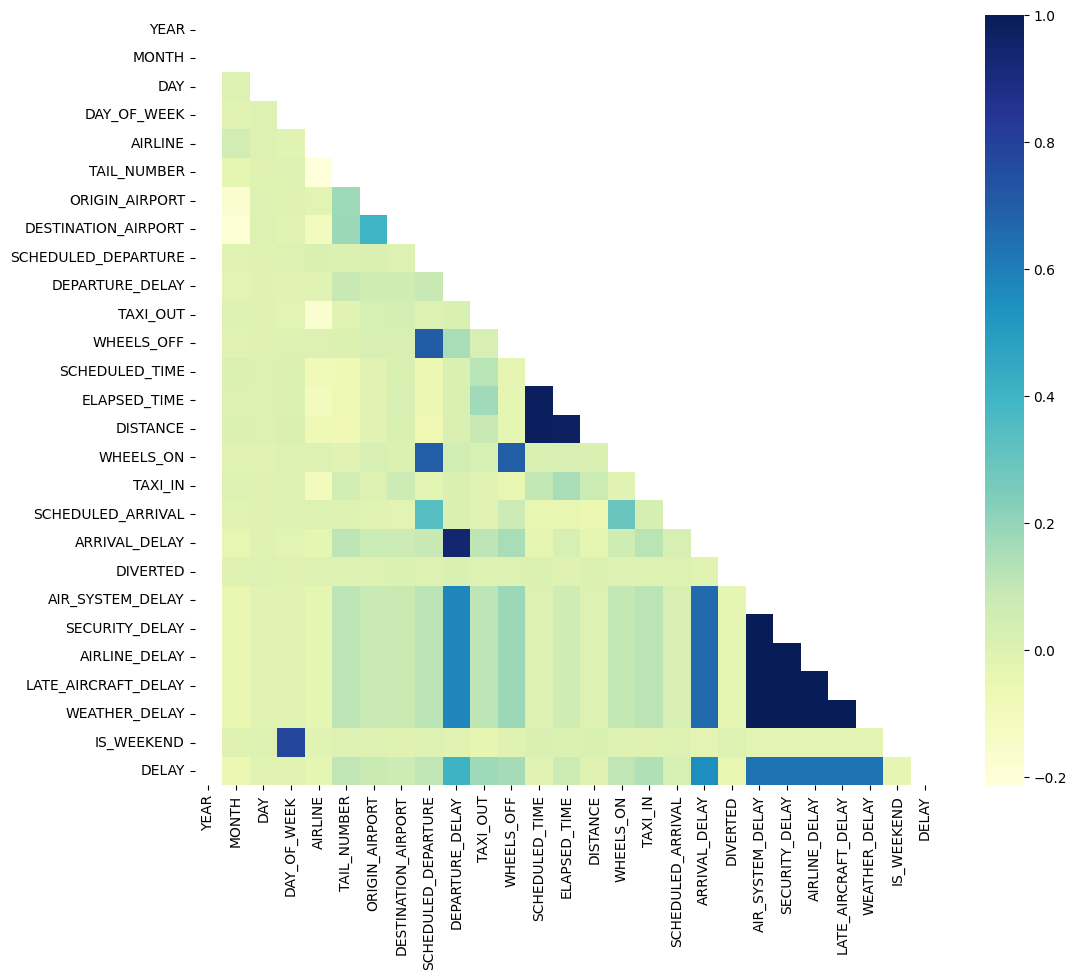

In [41]:
#correlation matrix
plt.figure(figsize=(12, 10))
mask = np.triu(np.ones_like(df_num.corr()))
dataplot = sns.heatmap(df_num.corr(), cmap="YlGnBu", annot=False, mask=mask)
plt.show()

In [42]:
#finding important features
correlation_matrix = df_num.corr()
target_correlation = correlation_matrix['DELAY'].sort_values(ascending=False).to_dict()
important_variables = {v: k for v, k in target_correlation.items() if 0.10 < abs(k)<0.5}
important_columns=list(important_variables.keys())
important_columns

['DEPARTURE_DELAY',
 'TAXI_OUT',
 'WHEELS_OFF',
 'TAXI_IN',
 'TAIL_NUMBER',
 'SCHEDULED_DEPARTURE',
 'WHEELS_ON']

In [43]:
df_filtered=df_num[important_columns]
df_filtered.head()

,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,TAXI_IN,TAIL_NUMBER,SCHEDULED_DEPARTURE,WHEELS_ON
0,0.0,1,-2.695081,4.0,-1.803252,0,-2.044223
1,0.0,0,-2.697089,4.0,1.464627,0,-1.406522
2,0.0,1,-2.656928,11.0,4.277692,0,-1.285875
3,0.0,1,-2.664960,8.0,3.663923,0,-1.385456
4,0.0,0,-2.654920,5.0,-1.895155,0,-2.331476


In [44]:
df_filtered = pd.concat([df_filtered, df_num['DELAY']], axis=1)

In [45]:
x1 = df_filtered.drop(columns=['DELAY'])
y1 = df_filtered['DELAY']

from sklearn.model_selection import train_test_split
x1_train, x1_test, y1_train, y1_test = train_test_split(x1, y1, test_size = 0.5, random_state = 124)

In [46]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
classifier = RandomForestClassifier(n_estimators = 3, criterion = 'gini', random_state = 124)
classifier.fit(x1_train, y1_train)
y1_pred = classifier.predict(x1_test)
print(pd.crosstab(y1_test, y1_pred, rownames=['Actual'], colnames=['Predicted']))
print(accuracy_score(y1_test, y1_pred))

Predicted        0       1
Actual                    
0          1569616  250795
1           322894  721293
0.799731410829722


In [ ]:
def column_transformer (df, col):
    feature_transformation_metrics={}
    #Min-Max-Scaler
    try:
        from sklearn.preprocessing import MinMaxScaler
        scaler = MinMaxScaler()
        data_to_scale = df[col].values.reshape(-1, 1)
        df[f'{col}_min_max'] = scaler.fit_transform(data_to_scale)
        min_max_corr_value=df[f'{col}_min_max'].corr(df[col])
        feature_transformation_metrics['min_max']=abs(min_max_corr_value)
    except:
        pass
    
    #Standard Scaler
    try:
        from sklearn.preprocessing import StandardScaler
        scaler = StandardScaler()
        data_to_scale = df[col].values.reshape(-1, 1)
        df[f'{col}_scaler'] = scaler.fit_transform(data_to_scale)
        scaler_corr_value=df[f'{col}_scaler'].corr(df[col])
        feature_transformation_metrics['standard_scaler']=abs(scaler_corr_value)
    except:
        pass
    
    #MaxABSScaler
    try:
        from sklearn.preprocessing import MaxAbsScaler
        scaler = MaxAbsScaler()
        data_to_scale = df[col].values.reshape(-1, 1)
        df[f'{col}_max_abs_scaler'] = scaler.fit_transform(data_to_scale)
        max_abs_scaler_corr_value=df[f'{col}_max_abs_scaler'].corr(df[col])
        feature_transformation_metrics['max_abs_scaler']=abs(max_abs_scaler_corr_value)
    except:
        pass
    
    #Robust Scaler
    try:
        from sklearn.preprocessing import RobustScaler
        scaler = RobustScaler()
        data_to_scale = df[col].values.reshape(-1, 1)
        df[f'{col}_robust_scaler'] = scaler.fit_transform(data_to_scale)
        robust_scaler_corr_value=df[f'{col}_robust_scaler'].corr(df[col])
        feature_transformation_metrics['robust_scaler']=abs(robust_scaler_corr_value)
    except:
        pass
       
    #Quantile Scaler
    try:
        from sklearn.preprocessing import QuantileTransformer
        scaler = QuantileTransformer()
        data_to_scale = df[col].values.reshape(-1, 1)
        df[f'{col}_quantile_scaler'] = scaler.fit_transform(data_to_scale)
        quantile_scaler_corr_value=df[f'{col}_quantile_scaler'].corr(df[col])
        feature_transformation_metrics['quantile_scaler']=abs(quantile_scaler_corr_value)
    except:
        pass
    
    #log transformaiton
    try:
        df[f'{col}_log']= np.log(df[col])
        log_corr_calue=df[f'{col}_log'].corr(df[col])
        feature_transformation_metrics['log']=abs(log_corr_calue)
    except:
        pass
    
    #power transformation - method box-cox
    try:
        from sklearn.preprocessing import PowerTransformer
        scaler = PowerTransformer(method = 'box-cox')
        data_to_scale = df[col].values.reshape(-1, 1)
        df[f'{col}_power_box_cox'] = scaler.fit_transform(data_to_scale)
        power_box_cox_corr_value=df[f'{col}_power_box_cox'].corr(df[col])
        feature_transformation_metrics['power_box_cox']=abs(power_box_cox_corr_value)
    except:
        pass
    
    #power transformation - method yeo-johnson
    try:
        from sklearn.preprocessing import PowerTransformer
        scaler = PowerTransformer(method = 'yeo-johnson')
        data_to_scale = df[col].values.reshape(-1, 1)
        df[f'{col}_power_yeo_johnson'] = scaler.fit_transform(data_to_scale)
        power_box_cox_corr_value=df[f'{col}_power_yeo_johnson'].corr(df[col])
        feature_transformation_metrics['power_yeo_johnson']=abs(power_box_cox_corr_value)
    except:
        pass
    
    #Unit-vector normalizer
    try:
        from sklearn.preprocessing import Normalizer
        scaler = Normalizer(norm = 'l2')
        data_to_scale = df[col].values.reshape(-1, 1)
        df[f'{col}_unit_vector_normalizer'] = scaler.fit_transform(data_to_scale)
        unit_vector_cox_corr_value=df[f'{col}_unit_vector_normalizer'].corr(df[col])
        feature_transformation_metrics['unit_vector_normalizer']=abs(unit_vector_cox_corr_value)
    except:
        pass
    
    best_metric=max(feature_transformation_metrics.values())
    
    for key, value in feature_transformation_metrics.items():  
        if value == best_metric:
            print(col, key, value)
    
    
    
    
    
    
    
    
    
    

In [ ]:
'''The MinMax scaler is one of the simplest scalers to understand.  It just scales all the data between 0 and 1. The formula for calculating the scaled value is-

x_scaled = (x – x_min)/(x_max – x_min)'''

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
Apply it on only the values of the features:
df_scaled[col_names] = scaler.fit_transform(features.values)

In [ ]:
'''For each feature, the Standard Scaler scales the values such that the mean is 0 and the standard deviation is 1(or the variance).

x_scaled = x – mean/std_dev'''

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

df_scaled[col_names] = scaler.fit_transform(features.values)
df_scaled

In [ ]:
'''the MaxAbs scaler takes the absolute maximum value of each column and divides each value in the column by the maximum value.'''

from sklearn.preprocessing import MaxAbsScaler
scaler = MaxAbsScaler()

df_scaled[col_names] = scaler.fit_transform(features.values)
df_scaled

In [ ]:
'''The Robust Scaler, as the name suggests is not sensitive to outliers. This scaler-

removes the median from the data
scales the data by the InterQuartile Range(IQR)

x_scaled = (x – Q1)/(Q3 – Q1)'''

from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()

df_scaled[col_names] = scaler.fit_transform(features.values)
df_scaled

In [ ]:
'''the Quantile Transformer Scaler:

1. It computes the cumulative distribution function of the variable

2. It uses this cdf to map the values to a normal distribution

3. Maps the obtained values to the desired output distribution using the associated quantile function'''

from sklearn.preprocessing import QuantileTransformer
scaler = QuantileTransformer()

df_scaled[col_names] = scaler.fit_transform(features.values)
df_scaled

In [ ]:
'''the log operation had a dual role:

Reducing the impact of too-low values
Reducing the impact of too-high values.'''

df['log_income'] = np.log(df['Income'])

In [ ]:
'''that Box-Cox works with only positive values, while Yeo-Johnson works with both positive and negative values.'''

from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method = 'box-cox')
'''
parameters:
method = 'box-cox' or 'yeo-johnson'
'''

df_scaled[col_names] = scaler.fit_transform(features.values)
df_scaled

In [ ]:
'''Unit-Vector Normalizer
If we are using L1 norm, the values in each column are converted so that the sum of their absolute values along the row = 1
If we are using L2 norm, the values in each column are first squared and added so that the sum of their absolute values along the row = 1'''
from sklearn.preprocessing import Normalizer
scaler = Normalizer(norm = 'l2')
# norm = 'l2' is default

df_scaled[col_names] = scaler.fit_transform(features.values)
df_scaled